### 1. Import the Time Series

We start by importing the CSV file and parsing the `date` column as a datetime index. This will allow us to perform time series operations easily.


In [16]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/a10.csv", parse_dates=['date'], index_col='date')
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


### 2. Visualize the Time Series

We'll plot the time series to get a basic understanding of trends, seasonality, or sudden changes.

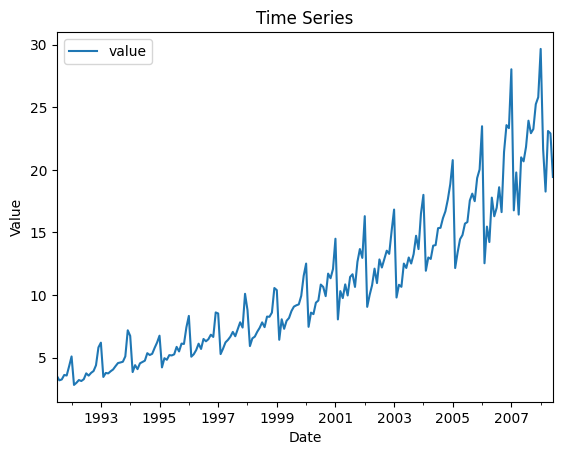

In [17]:
import matplotlib.pyplot as plt

df.plot(title='Time Series')
plt.ylabel('Value')
plt.xlabel('Date')
plt.show()

### 3. Seasonal Plot

We plot values month-wise across years to see if there's any seasonal behavior. We'll extract month and year from the index.

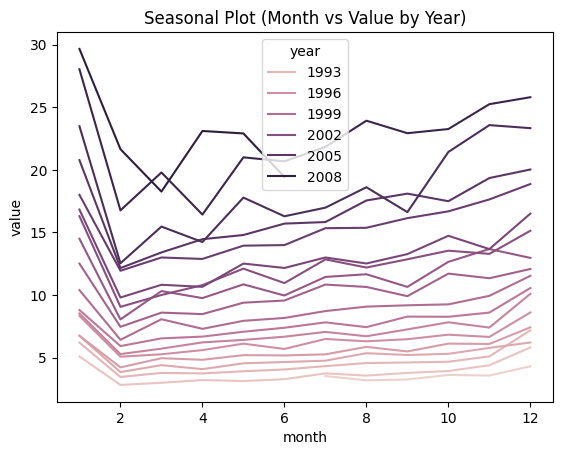

In [18]:
import seaborn as sns

df['month'] = df.index.month
df['year'] = df.index.year

sns.lineplot(data=df, x='month', y='value', hue='year')
plt.title('Seasonal Plot (Month vs Value by Year)')
plt.show()

### 4. Boxplot of Month-wise and Year-wise Distributions

Boxplots help understand the spread and median of values month-wise and year-wise. This reveals trends and seasonality.

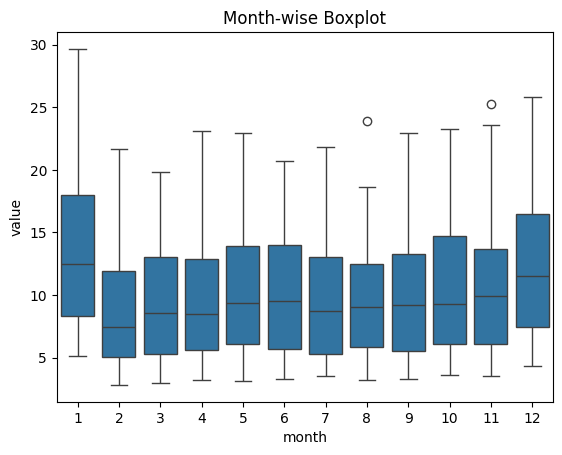

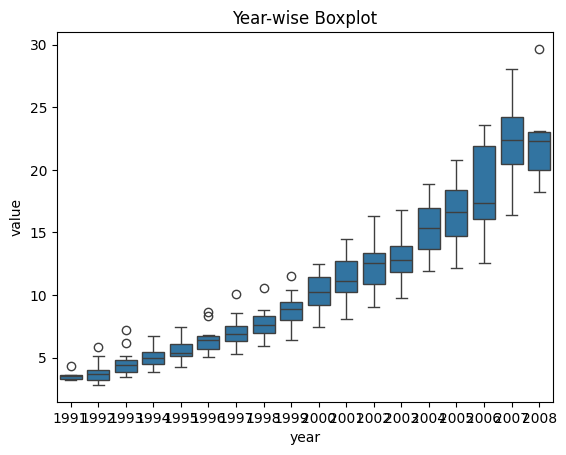

In [19]:
# Month-wise boxplot
sns.boxplot(x='month', y='value', data=df)
plt.title('Month-wise Boxplot')
plt.show()

# Year-wise boxplot
sns.boxplot(x='year', y='value', data=df)
plt.title('Year-wise Boxplot')
plt.show()

### 5. Patterns in Time Series

We use a rolling mean (12-month window) to observe trends or patterns in the time series.

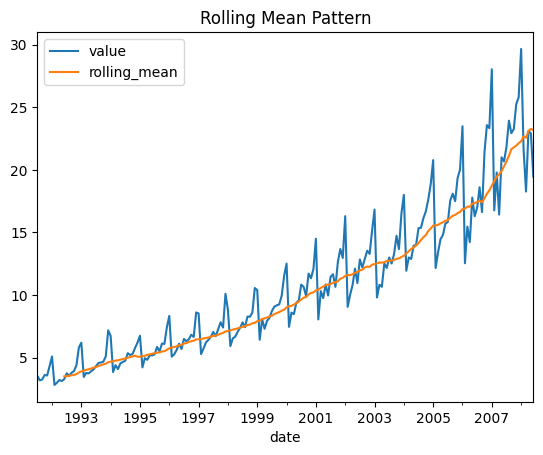

In [20]:
df['rolling_mean'] = df['value'].rolling(window=12).mean()
df[['value', 'rolling_mean']].plot(title='Rolling Mean Pattern')
plt.show()

### 6. Additive and Multiplicative Models

We decompose the time series into trend, seasonal, and residual components using both additive and multiplicative models.

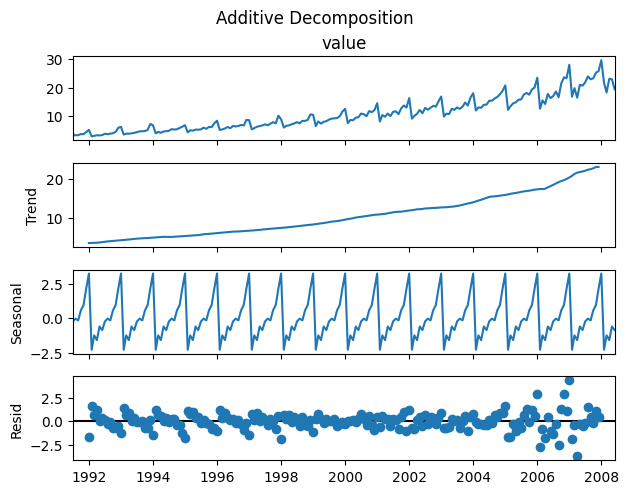

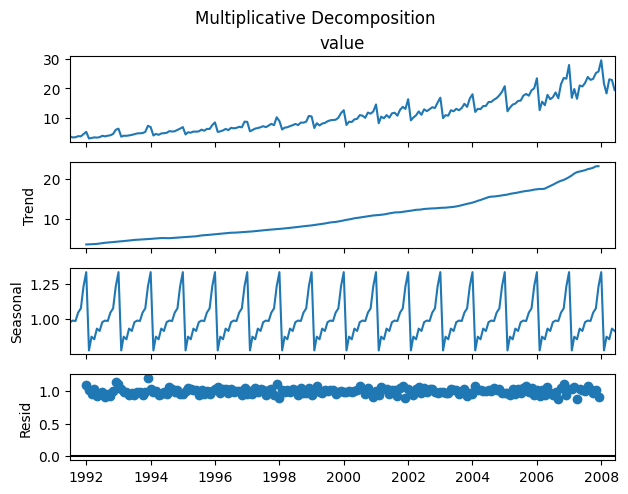

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

add = seasonal_decompose(df['value'], model='additive', period=12)
mult = seasonal_decompose(df['value'], model='multiplicative', period=12)

add.plot(); plt.suptitle("Additive Decomposition", y=1.02)
plt.show()

mult.plot(); plt.suptitle("Multiplicative Decomposition", y=1.02)
plt.show()

### 7. Stationarity Test (ADF Test)

We apply the Augmented Dickey-Fuller (ADF) test to determine if the time series is stationary.

In [22]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['value'].dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: 3.14518568930673
p-value: 1.0


### 8. Make the Series Stationary

We remove trend and seasonality by differencing the series. First-order differencing is the most common method.

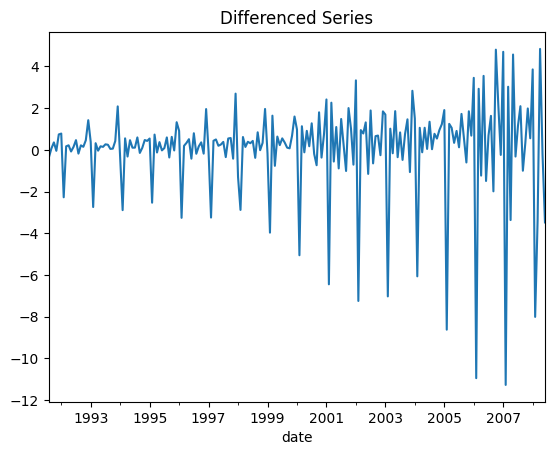

In [23]:
df['diff'] = df['value'] - df['value'].shift(1)
df['diff'].dropna().plot(title='Differenced Series')
plt.show()

### 9. Detrending a Time Series

We subtract the rolling mean from the original series to remove the trend.

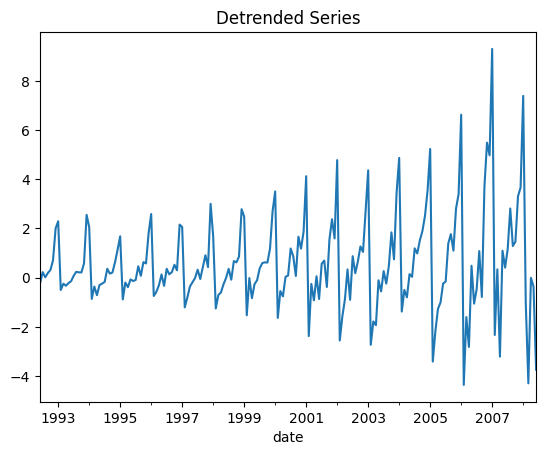

In [24]:
df['detrended'] = df['value'] - df['rolling_mean']
df['detrended'].dropna().plot(title='Detrended Series')
plt.show()

### 10. Deseasonalize the Series

We remove the seasonal component obtained from decomposition to focus on the trend and residual.

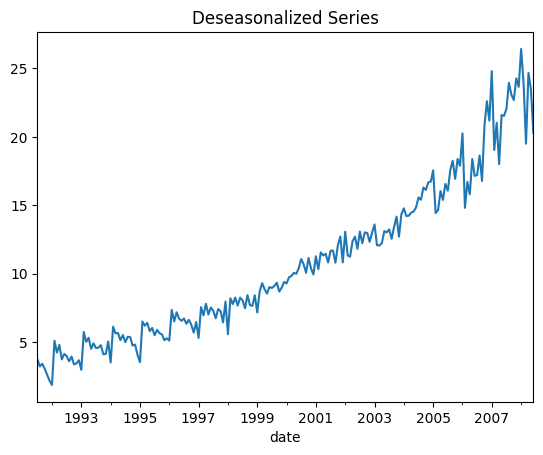

In [25]:
df['seasonal'] = add.seasonal
df['deseasonal'] = df['value'] - df['seasonal']
df['deseasonal'].dropna().plot(title='Deseasonalized Series')
plt.show()

### 11. Test for Seasonality

We use autocorrelation plots to detect repeated seasonal patterns. Peaks at lags indicate seasonality.

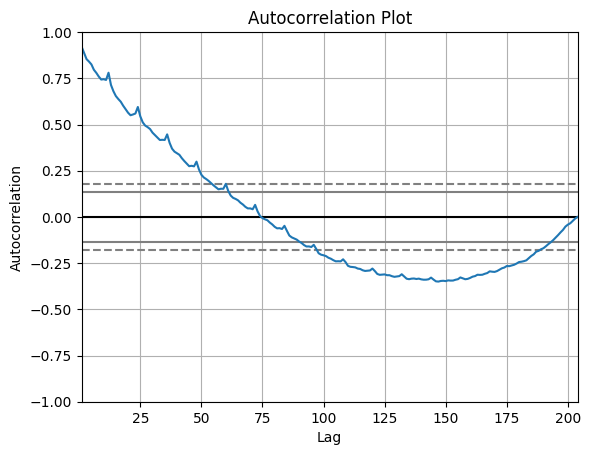

In [26]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['value'])
plt.title('Autocorrelation Plot')
plt.show()